In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio.Seq import Seq
import bioinfo

In [5]:
df = bioinfo.gen_df("./data/TRIM5ALPHA_complete_PopSet")

In [6]:
df_total = pd.DataFrame()

for i in range(17):    
    b = bioinfo.gen_df2(df['Species'][i],df['Sequence'][i],3)
    y = np.empty(len(b.index))
    y[:] = i
    b['label'] = y
    b.reset_index(drop=True, inplace=True)
    df_total.reset_index(drop=True, inplace=True)
    df_total = pd.concat([b, df_total], axis=0)   


In [27]:
from sklearn.manifold import TSNE

feat_cols = list(filter(lambda col: col != 'Fragment' and col != 'label',df_total.columns))

rndperm = np.random.permutation(2816)
n_sne = 2000
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_total.loc[rndperm[:n_sne],feat_cols].values)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2138 samples in 0.011s...
[t-SNE] Computed neighbors for 2138 samples in 0.503s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2138
[t-SNE] Computed conditional probabilities for sample 2000 / 2138
[t-SNE] Computed conditional probabilities for sample 2138 / 2138
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.233665
[t-SNE] KL divergence after 300 iterations: 1.588419


/usr/lib/python3.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


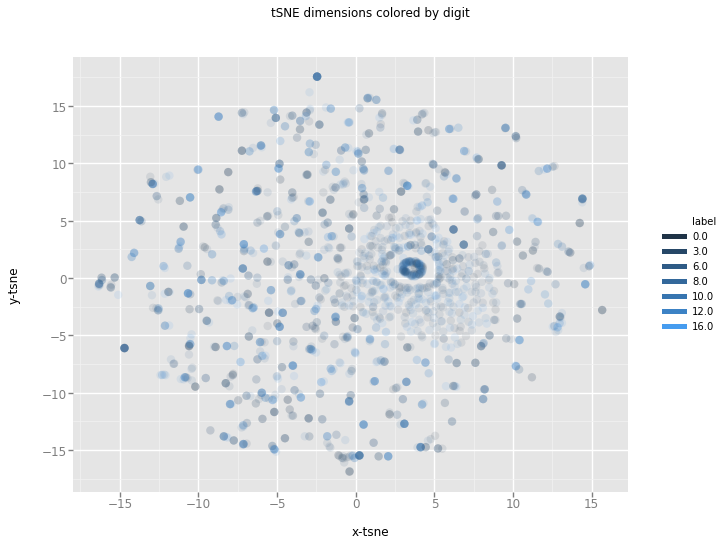

<ggplot: (-9223363246134363872)>

In [28]:
from ggplot import *

df_tsne = df_total.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart